## Tutorial

Use [Anaconda](https://www.continuum.io/) to create a Python environment to use ipymd in:

    conda create -n ipymd -c http://conda.binstar.org/gabrielelanaro chemlab matplotlib pandas ipython ipython-notebook pil pyopengl==3.0.2

In [1]:
%matplotlib inline
import ipymd
print ipymd.version()

0.0.1


### Basic Atom Creation and Visualisation

In [2]:
import pandas as pd
df = pd.DataFrame(
        [['Fe',2,3,4,1,1,'blue',1],
         ['Cr',1,3,3,-1,1,'orange',1],
         ['Fe',4,3,1,1,1,'blue',1]],
        columns=['type','xs','ys','zs','q','radius','color','transparency'])

<PIL.Image._ImageCrop image mode=RGBA size=134x54 at 0x11809DB00>


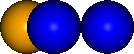

In [3]:
vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_atoms(df)
img1 = vis.get_image()
print img1
vis.visualise(img1)

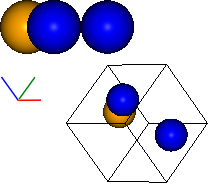

In [4]:
vis.add_axes(length=0.2, offset=(-0.3,0))
vis.add_box([[5,0,0],[0,5,0],[0,0,5]])
img2 = vis.get_image(xrot=45, yrot=45)
vis.visualise([img1,img2])

### Atom Creation From Other Sources

#### Crystal Parameters

In [5]:
df = ipymd.data_input.crystal.get_spacegroup_df()
df.loc[[1,225]]

,System_type,Point group,Short_name,Full_name,Schoenflies,Fedorov,Shubnikov,Fibrifold
Number,,,,,,,,
1,triclinic,1,P1,P 1,$C_1^1$,1s,$(a/b/c)\cdot 1$,-
225,cubic,4/m 3 2/m,Fm3m,F 4/m 3 2/m,$O_h^5$,73s,$\left ( \frac{a+c}{2}/\frac{b+c}{2}/\frac{a+b...,$2^{-}:2$


In [6]:
data = ipymd.data_input.crystal.Crystal(
    [[0.0, 0.0, 0.0], [0.5, 0.5, 0.5]], ['Na', 'Cl'], 
    225, cellpar=[.54, .54, .54, 90, 90, 90], 
    repetitions=[5, 5, 5])

sim_abc, sim_origin = data.get_simulation_box()
print sim_origin
print sim_abc
atoms_df = data.get_atom_data()
atoms_df.head(5)

[ 0.  0.  0.]
[[  2.70000000e+01   0.00000000e+00   0.00000000e+00]
 [  1.65327318e-15   2.70000000e+01   0.00000000e+00]
 [  1.65327318e-15   1.65327318e-15   2.70000000e+01]]


,id,type,xs,ys,zs,transparency,color,radius
0,1,Na,0.000000e+00,0.000000e+00,0.0,1,light_salmon,1
1,2,Na,3.306546e-16,2.700000e+00,2.7,1,light_salmon,1
2,3,Na,2.700000e+00,1.653273e-16,2.7,1,light_salmon,1
3,4,Na,2.700000e+00,2.700000e+00,0.0,1,light_salmon,1
4,5,Cl,2.700000e+00,2.700000e+00,2.7,1,medium_aquamarine,1


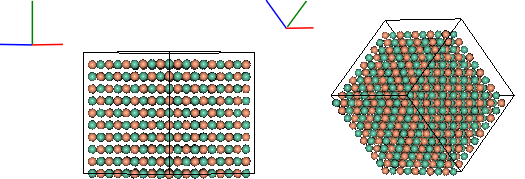

In [7]:
vis2 = ipymd.visualise_sim.Visualise_Sim()
vis2.add_axes()
vis2.add_box(sim_abc, sim_origin)
vis2.add_atoms(atoms_df)
images = [vis2.get_image(xrot=xrot,yrot=45) for xrot in [0,45]]
vis2.visualise(images, columns=2)

#### Crystallographic Information Files

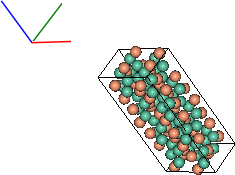

In [8]:
cif_path = ipymd.get_test_path('example_crystal.cif')
data = ipymd.data_input.cif.CIF(cif_path)
vis = ipymd.visualise_sim.Visualise_Sim()
vis.basic_vis(data.get_atom_data(), data.get_simulation_box(),
              xrot=45,yrot=45)

#### Lammps Output Data

98


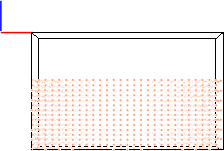

In [18]:
lammps_path = ipymd.get_test_path(['atom_dump','atoms_*.dump'])
data = ipymd.data_input.lammps.LAMMPS_Output(lammps_path)
print data.count_timesteps()

vis = ipymd.visualise_sim.Visualise_Sim()
vis.basic_vis(data.get_atom_data(98), data.get_simulation_box(98),
              spheres=False,xrot=90,yrot=0)

## Not Added

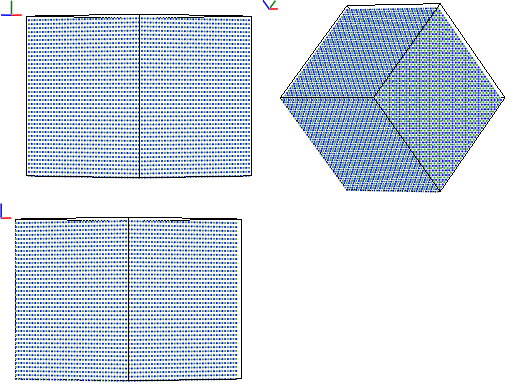

In [12]:
vis2 = ipymd.visualise_sim.Visualise_Sim()
vis2.add_box(*data.get_simulation_box())
vis2.add_axes()

new_df = manipulate_atoms(data.get_atom_data())
new_df.apply_radiimap({'Na':1, 'Cl':0.5})
new_df.apply_colormap()
new_df.change_type_variable('Cl', 'transparency', 0.8)

vis2.add_atoms(new_df.df, spheres=False)

images = [vis2.get_image(xrot=xrot,yrot=45) for xrot in [0,45,90]]
vis2.visualise(images, columns=2)

In [1]:
manipulate_atoms = ipymd.atom_manipulation.Atom_Manipulation

In [2]:
data = ipymd.data_input.lammps.LAMMPS_Output(
    sys_path=ipymd.get_test_path('system.dump'),
    atom_path=ipymd.get_test_path(['atom_dump','atoms_*.dump']))

In [3]:
sys_data = data.get_system_data()
sys_data.tail()

,time,natoms,a,b,vol,press,temp,peng,keng,teng,enth
94,18800,5880,4.000919,4.000920,106961.684112,3984.476256,20.821004,-576758.385663,364.871078,-576393.514586,-570178.024689
95,19000,5880,4.002667,4.002667,107055.104770,3457.822223,20.543535,-576743.788115,360.008650,-576383.779465,-570985.120033
96,19200,5880,3.995696,3.995696,106682.545808,1880.020740,14.949236,-576635.072775,261.973143,-576373.099632,-573448.059018
97,19400,5880,3.990131,3.990134,106385.666301,499.341106,21.315529,-576735.710976,373.537223,-576362.173753,-575587.433134
98,19600,5880,3.979611,3.979609,105825.294988,-2300.315883,17.161320,-576652.409368,300.738098,-576351.671270,-579901.871560


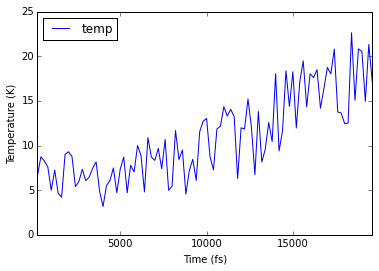

In [4]:
ax = sys_data.plot('time','temp')
ax.set_xlabel('Time (fs)')
ax.set_ylabel('Temperature (K)');

In [5]:
print data.get_atom_timestep(98)
atom_data = data.get_atom_data(98)
sim_abc, sim_origin = data.get_simulation_box(98)
atom_data.head()

9800


,id,type,xs,ys,zs,mass,q,transparency,color,radius
0,259,1,-27.857561,-21.882633,7.196651,55.845,-1.505560e-07,1,light_salmon,1
1,267,1,-27.861259,-25.857124,7.188060,55.845,-2.182330e-07,1,light_salmon,1
2,269,1,-25.863859,-23.880771,7.181207,55.845,-2.916280e-07,1,light_salmon,1
3,271,1,-23.879500,-21.886533,7.184821,55.845,-2.084570e-07,1,light_salmon,1
4,279,1,-25.866796,-27.853247,7.182366,55.845,-1.888220e-07,1,light_salmon,1


In [6]:
print sim_abc
print sim_origin

[[ 55.7146   0.       0.    ]
 [  0.      55.7146   0.    ]
 [  0.       0.      34.092 ]]
[-27.8573 -27.8573   0.    ]


In [7]:
vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_atoms(atom_data,spheres=True)
vis.add_box(sim_abc, sim_origin)
vis.add_axes()
a=vis._atoms[0][0]

In [8]:
vis = ipymd.visualise_sim.Visualise_Sim()
vis.add_atoms(atom_data,spheres=False)
vis.add_box(sim_abc, sim_origin)
vis.add_axes()
b=vis._atoms[0][0]

In [9]:
b=vis._atoms[0][0]

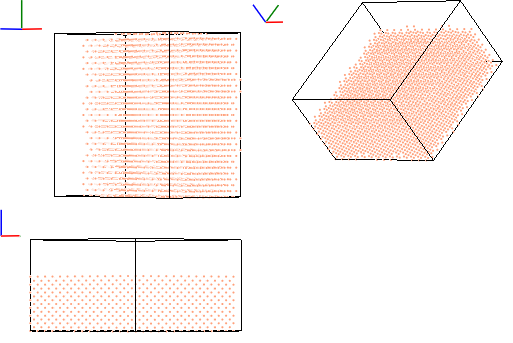

In [10]:
images = [vis.get_image(xrot=xrot,yrot=45) for xrot in [0,45,90]]
vis.visualise(images, columns=2)

In [11]:
df = ipymd.data_input.crystal.get_spacegroup_df()
df.loc[191:194]

,System_type,Point group,Short_name,Full_name,Schoenflies,Fedorov,Shubnikov,Fibrifold
Number,,,,,,,,
191,hexagonal,6/m 2/m 2/m,P6/mmm,P 6/m 2/m 2/m,$D_{6h}^1$,58s,$(c:(a/a))\cdot m:6\cdot m$,-
192,hexagonal,6/m 2/m 2/m,P6/mcc,P 6/m 2/c 2/c,$D_{6h}^2$,48h,$(c:(a/a))\cdot m:6\cdot\tilde c$,-
193,hexagonal,6/m 2/m 2/m,P63/mcm,P 63/m 2/c 2/m,$D_{6h}^3$,87a,$(c:(a/a))\cdot m:6_3\cdot\tilde c$,-
194,hexagonal,6/m 2/m 2/m,P63/mmc,P 63/m 2/m 2/c,$D_{6h}^4$,88a,$(c:(a/a))\cdot m:6_3\cdot m$,-


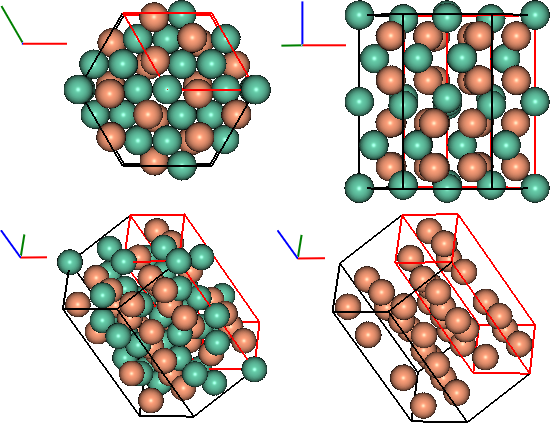

In [13]:
data = ipymd.data_input.lammps.LAMMPS_Input(ipymd.get_test_path('crystal_data.data'))
atom_df = data.get_atom_data('charge')
sim_abc, sim_origin = data.get_simulation_box()

atom_manip = ipymd.atom_manipulation.Atom_Manipulation
new_df = atom_manip(atom_df)
new_df.repeat_cell(sim_abc,repetitions=((-2,2),(-2,2),(-1,1)))
new_df.change_variables({1:'Fe',2:'S'}, vtype='type')
new_df.filter_inside_hexagon(sim_abc[[0,2]], sim_origin)

vis3 = ipymd.visualise_sim.Visualise_Sim()
vis3.add_box(sim_abc,sim_origin,width=2, color='red')
vis3.add_axes(sim_abc, length=0.3,offset=(-0.4,-0.2),width=2)
vis3.add_hexagon(sim_abc[[0,2]],sim_origin, width=2)
vis3.add_atoms(new_df.df)

img1 = vis3.get_image(xrot=0,yrot=0,height=500,width=500)
img2 = vis3.get_image(xrot=90,yrot=0,height=500,width=500)
img3 = vis3.get_image(xrot=45,yrot=45,height=500,width=500)

vis3.remove_atoms()
new_df.filter_variables('Fe', vtype='type')
vis3.add_atoms(new_df.df)
img4 = vis3.get_image(xrot=45,yrot=45,fov=5,height=500,width=500)

#img.save('test.png')
vis3.visualise([img1,img2,img3,img4],columns=2)

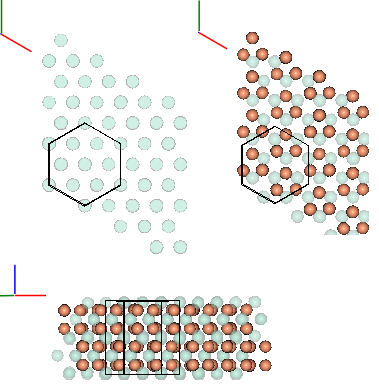

In [14]:
vis3 = ipymd.visualise_sim.Visualise_Sim()

vis3.add_axes(sim_abc,length=0.5,offset=(-0.7,0.1))

new_df = atom_manip(atom_df)
new_df.repeat_cell(sim_abc,repetitions=((-1,2),(-1,2),(0,0)))
new_df.change_variables({1:'Fe',2:'S'})
rep_df = new_df.df

new_df.slice_z(7, 10)
vis3.add_hexagon(sim_abc[[0,2]],sim_origin)

new_df.change_type_variable('S', 'transparency', 0.4)
vis3.add_atoms(new_df.df)

img1 = vis3.get_image(zrot=-30,fov=5)

vis3.remove_atoms()
new_df = atom_manip(rep_df)
new_df.change_variables({1:'Fe',2:'S'})
mid, thick = 5.9, 1.4
new_df.slice_z(mid-thick/2., mid+thick/2.)

new_df.change_type_variable('S', 'transparency', 0.4)
vis3.add_atoms(new_df.df, illustrate=True)

img2 = vis3.get_image(zrot=-30,fov=5)

vis3.remove_atoms()
new_df = atom_manip(rep_df)

new_df.change_type_variable('S', 'transparency', 0.4)
vis3.add_atoms(new_df.df)

img3 = vis3.get_image(xrot=90)

vis3.visualise([img2, img1, img3],columns=2)

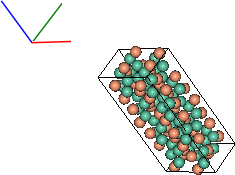

In [15]:
data = ipymd.data_input.cif.CIF(ipymd.get_test_path('example_crystal.cif'))
vis = ipymd.visualise_sim.Visualise_Sim()
vis.basic_vis(data.get_atom_data(), data.get_simulation_box(),xrot=45,yrot=45)

360.910673814 2.92277307527


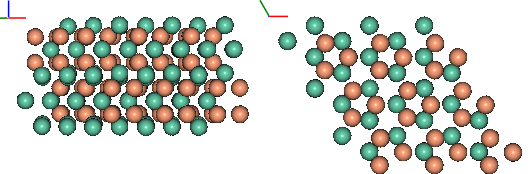

In [16]:
data = ipymd.data_input.crystal.Crystal(
    [[0.37910,   0.05490,   0.12303],
    [0.00000,   0.00000,   0.00000],
    [0.33333,   0.66667,   0.01980],
    [0.66530,  -0.00350,   0.25000]], 
    ['Fe','S','S','S'],
    190, cellpar=[.5958, .5958, 1.174, 90, 90, 120],
    mass_map={'Fe':55.8450,'S':32.06})
sim_abc, sim_origin = data.get_simulation_box()

analysis = ipymd.atom_analysis.Atom_Analysis(data.get_atom_data(), sim_abc)
print analysis.calc_volume(), analysis.calc_density()

atoms = ipymd.atom_manipulation.Atom_Manipulation(data.get_atom_data())
atoms.repeat_cell(sim_abc, repetitions=(2,2,0))
atoms.filter_inside_box

vis = ipymd.visualise_sim.Visualise_Sim()
#vis.add_box(sim_abc, sim_origin)
vis.add_axes(sim_abc, length=0.2,offset=(-0.2,0.1))

vis.add_atoms(atoms.df)
img1 = vis.get_image(xrot=90, yrot=0,fov=5)

vis.remove_atoms()
atoms.slice_z(2,5)

new_df.change_type_variable('S', 'transparency', 0.4)
vis.add_atoms(atoms.df)
img2 = vis.get_image(xrot=0, yrot=0,fov=5)

vis.visualise([img1,img2],columns=2)

2846.26763781


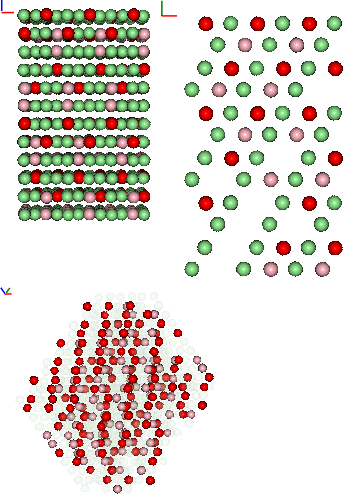

In [18]:
data = ipymd.data_input.cif.CIF(ipymd.get_test_path('/Users/cjs14/Downloads/AMS_DATA(7).cif'), ignore_overlaps=True)
sim_abc, sim_origin = data.get_simulation_box()

analysis = ipymd.atom_analysis.Atom_Analysis(data.get_atom_data(), sim_abc)
print analysis.calc_volume()

df = data.get_atom_data()
df.loc[(df['type']=='Fe'),'color'] = 'light_green'
df.loc[(df['type']=='Fe') & (df.occupancy < 1),'color'] = 'red'
df.loc[(df['type']=='Fe') & (df.occupancy < 0.75),'color'] = 'light_pink'

atoms = ipymd.atom_manipulation.Atom_Manipulation(df)
atoms.repeat_cell(sim_abc, repetitions=(2,2,0))
#atoms.filter_inside_box
atoms.filter_variables(['Fe'])

vis = ipymd.visualise_sim.Visualise_Sim()
#vis.add_box(sim_abc, sim_origin)
vis.add_axes(sim_abc, length=0.2,offset=(-0.4,0.1))

vis.add_atoms(atoms.df)
img1 = vis.get_image(xrot=90, yrot=0,fov=5)

vis.remove_atoms()
#atoms.slice_z(0,2)
atoms.slice_z(2,5)
df = atoms.df
import random
vis.add_atoms(df[df['occupancy'].apply(lambda x: 0 if random.random()>x else 1)==1])
img2 = vis.get_image(xrot=0, yrot=0,fov=5)

vis.remove_atoms()
atoms.undo_last()
df = atoms.df
df.loc[(df['type']=='Fe') & (df.occupancy == 1),'transparency'] = 0.1


vis.add_atoms(df[df['occupancy'].apply(lambda x: 0 if random.random()>x else 1)==1])
img3 = vis.get_image(xrot=45, yrot=45,fov=5)

vis.visualise([img1,img2,img3],columns=2)

In [35]:
from fractions import gcd
df = data.get_atom_data()
s,fe = df[df['type']=='S'].shape[0], df[df['type']=='Fe'].shape[0]
print 'Fe_{0}S_{1}'.format(fe/gcd(s,fe), s/gcd(s,fe))

Fe_4S_3


In [136]:
new = df[df['occupancy'].apply(lambda x: 0 if random.random()>x else 1)==1]
s,fe = new[new['type']=='S'].shape[0], new[new['type']=='Fe'].shape[0]
print fe/float(s)
print 'Fe_{0}S_{1}'.format(fe/gcd(s,fe), s/gcd(s,fe))

1.11458333333
Fe_107S_96


In [147]:
df.shape[0]

260